# SGM figure 2

In [1]:
%load_ext autoreload
%autoreload 1
from pkg.gmp import quadratic_assignment
from pkg.gmp import quadratic_assignment_ot
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 1

import sys
sys.path
sys.path.insert(0,'../../graspologic')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Caption:
Average match ratio $\pm$ 2 s.e. as a function of number of seeds $m$ for differenct correlation values $\rho$ in $\rho$-SBM simulations on $n=300 nodes.


In [13]:
from graspologic.simulations import sbm_corr
import random
import sys
from joblib import Parallel, delayed
from scipy.stats import sem
from sklearn.utils import check_random_state

n = 300
m = range(16)
rhos = 0.1 * np.arange(11)[3:]
ratios = np.zeros((len(m), 11))
error = np.zeros((len(m), 11))
n_per_block = 100
n_blocks = 3
block_members = np.array(n_blocks * [n_per_block])
block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])
directed = False
loops = False
n_realizations = 100
def match_ratio(perm):
    return np.mean(perm == np.arange(len(perm)))

np.random.seed(8888)
for k in range(len(rhos)):
    rho = rhos[k]
    for i in m:

        def run_sim(seed):
            A1, A2 = sbm_corr(
                block_members, block_probs, rho, directed=directed, loops=loops
            )

            W1 = np.sort(random.sample(list(range(n)), i))
            W1 = W1.astype(int)
            partial_match = np.column_stack((W1, W1))
            options={'maximize':True,'tol':1e-9,'maxiter':100,'partial_match':partial_match,'shuffle_input':True, 'reg': 100, 'thr':1e-2,}
            res = quadratic_assignment_ot(A1,A2,options=options)
            return match_ratio(res.col_ind)
        
        rng = check_random_state(k)
        seeds = rng.randint(np.iinfo(np.int32).max, size=n_realizations)
#         seeds = np.random.choice(int(1e8), size=n_realizations, replace=False)
        outs = Parallel(n_jobs=-1)(delayed(run_sim)(seed) for seed in seeds)
        ratios[i, k] = np.mean(outs)
        error[i,k] = sem(outs)



Text(0.5, 1.0, 'GOAT')

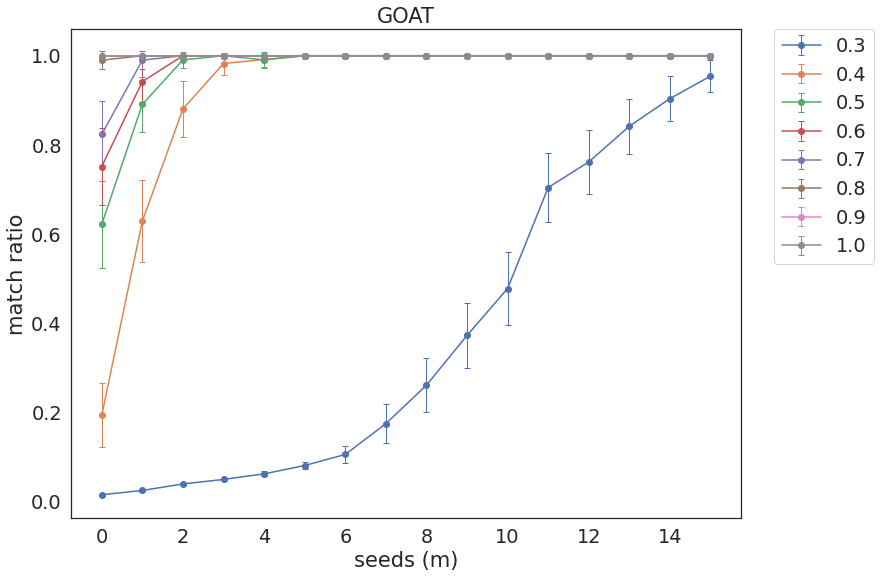

In [18]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize':(12,9)})
sns.set(font_scale = 1.75)
sns.set_style('white')
for i in range(len(rhos)):
#     plt.plot(m, ratios[:, i], "-o", label=str(np.around(rhos[i],2)))
    plt.errorbar(m,ratios[:, i], 2*error[:, i],fmt='-o',capsize=3, elinewidth=1, markeredgewidth=1, label=str(np.around(rhos[i],2)))


plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.xlabel("seeds (m)")
plt.ylabel("match ratio")
plt.title('GOAT')

In [15]:
from graspologic.simulations import sbm_corr
import random
import sys
from joblib import Parallel, delayed
from scipy.stats import sem
from sklearn.utils import check_random_state

n = 300
m = range(16)
rhos = 0.1 * np.arange(11)[3:]
ratios2 = np.zeros((len(m), 11))
error2 = np.zeros((len(m), 11))
n_per_block = 100
n_blocks = 3
block_members = np.array(n_blocks * [n_per_block])
block_probs = np.array([[0.7, 0.3, 0.4], [0.3, 0.7, 0.3], [0.4, 0.3, 0.7]])
directed = False
loops = False
n_realizations = 100
def match_ratio(perm):
    return np.mean(perm == np.arange(len(perm)))

np.random.seed(8888)
for k in range(len(rhos)):
    rho = rhos[k]
    for i in m:

        def run_sim(seed):
            A1, A2 = sbm_corr(
                block_members, block_probs, rho, directed=directed, loops=loops
            )

            W1 = np.sort(random.sample(list(range(n)), i))
            W1 = W1.astype(int)
            partial_match = np.column_stack((W1, W1))
            options={'maximize':True,'tol':1e-9,'maxiter':100,'partial_match':partial_match,'shuffle_input':True, 'rng':seed}
            res = quadratic_assignment(A1,A2,options=options)
            return match_ratio(res.col_ind)
        
        rng = check_random_state(k)
        seeds = rng.randint(np.iinfo(np.int32).max, size=n_realizations)
#         seeds = np.random.choice(int(1e8), size=n_realizations, replace=False)
        outs = Parallel(n_jobs=-1)(delayed(run_sim)(seed) for seed in seeds)
        ratios2[i, k] = np.mean(outs)
        error2[i,k] = sem(outs)

Text(0.5, 1.0, 'SGM')

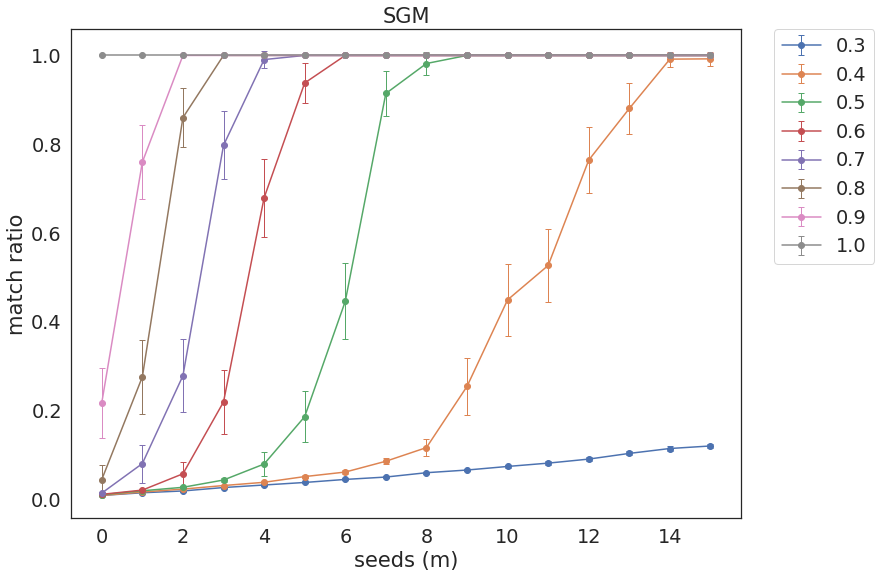

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in range(len(rhos)):
#     plt.plot(m, ratios[:, i], "-o", label=str(np.around(rhos[i],2)))
    plt.errorbar(m,ratios2[:, i], 2*error2[:, i],fmt='-o',capsize=3, elinewidth=1, markeredgewidth=1, label=str(np.around(rhos[i],2)))


plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.xlabel("seeds (m)")
plt.ylabel("match ratio")
plt.title('SGM')

## we observe that GOAT converges much faster than SGM. For instance, at worst case shown of $\rho = 0.5$, GOAT converges with two seeds, while SGM requires nine.